# Классификация Decision Tree (Решающее дерево)

**Dataset Description:**

- age : возраст (разница в 5 лет)
- height(cm) : рост (см)
- weight(kg) : вес (кг)
- waist(cm) : длина окружности талии (см)
- eyesight(left) : зрение (слева)
- eyesight(right) : зрение (справа)
- hearing(left) : слух (слева)
- hearing(right) : слух (справа)
- systolic : давление в артериях при сокращении сердца
- relaxation : давление в артериях при расслаблении
- fasting blood sugar : уровень сахара в крови натощак
- Cholesterol : общий уровень холестерина
- triglyceride : это тип жира, называемого липидами, который циркулирует в крови
- HDL : холестерин ЛПВП (липопротеины высокой плотности), иногда называемый «хорошим» холестерином, поглощает холестерин в крови и переносит его обратно в печень
- LDL : холестерин ЛПНП (липопротеины низкой плотности), иногда называемый «плохим» холестерином, составляет большую часть холестерина в вашем организме. Высокий уровень холестерина ЛПНП повышает риск сердечных заболеваний и инсульта
- hemoglobin : гемоглобин, белок, содержащийся в эритроцитах, который отвечает за доставку кислорода к тканям
- Urine protein : анализ на белок в моче измеряет белок в моче (моче), и большое его количество указывает на проблемы с почками.
- serum creatinine : продукт жизнедеятельности, вырабатываемый мышцами и отфильтровываемый почками. Большое его количество указывает на проблемы с почками
- AST : тип глутаминово-щавелево-уксусной трансаминазы. Слишком большое количество указывает на повреждение печени
- ALT : тип глутаминово-щавелево-уксусной трансаминазы. повышенный уровень АЛТ часто является признаком заболевания печени.
- Gtp : γ-GTP. Гамма-глютамилтранспептидаза – фермент (белок) печени и поджелудочной железы, активность которого в крови повышается при заболеваниях печени и злоупотреблении алкоголем.
- dental caries : кариес
- smoking : целевая переменная - курение

## Импортируем данные

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

from sklearn.tree import (
    DecisionTreeClassifier,  # Классификатор на основе дерева решений
    plot_tree,  # Функция для визуализации дерева решений
    export_text  # Функция для экспорта дерева решений в текстовом формате
)

# Импорт функций для визуализации дерева решений
from sklearn.tree import export_graphviz  # Функция для экспорта дерева решений в формат Graphviz
import graphviz  # Библиотека для визуализации графов

from mlxtend.plotting import plot_decision_regions  # Функция для визуализации границ решений

from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, \
                            confusion_matrix, precision_score, recall_score, \
                            roc_curve, f1_score, auc

import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv('train_dataset.csv')
data.head()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,35,170,85,97.0,0.9,0.9,1,1,118,78,97,239,153,70,142,19.8,1,1.0,61,115,125,1,1
1,20,175,110,110.0,0.7,0.9,1,1,119,79,88,211,128,71,114,15.9,1,1.1,19,25,30,1,0
2,45,155,65,86.0,0.9,0.9,1,1,110,80,80,193,120,57,112,13.7,3,0.6,1090,1400,276,0,0
3,45,165,80,94.0,0.8,0.7,1,1,158,88,249,210,366,46,91,16.9,1,0.9,32,36,36,0,0
4,20,165,60,81.0,1.5,0.1,1,1,109,64,100,179,200,47,92,14.9,1,1.2,26,28,15,0,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  int64  
 1   height(cm)           38984 non-null  int64  
 2   weight(kg)           38984 non-null  int64  
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  int64  
 7   hearing(right)       38984 non-null  int64  
 8   systolic             38984 non-null  int64  
 9   relaxation           38984 non-null  int64  
 10  fasting blood sugar  38984 non-null  int64  
 11  Cholesterol          38984 non-null  int64  
 12  triglyceride         38984 non-null  int64  
 13  HDL                  38984 non-null  int64  
 14  LDL                  38984 non-null  int64  
 15  hemoglobin           38984 non-null 

## Проведем EDA (Exploratory Data Analysis) - первичный анализ данных

Все данные в нашем датасете имеют числовое значение.

In [4]:
def eda_info(df):
    x = pd.DataFrame(
        {
            "Доля пропусков": df.isnull().mean(),
            "Минимальное значение": df.min(),
            "Максимальное значение": df.max(),
            "Среднее значение": df.mean(),
            "Медиана": df.median(),
            "Дисперсия": df.var(),
            "Квантиль 0.1": df.quantile(0.1),
            "Квантиль 0.9": df.quantile(0.9),
            "Квартиль 1": df.quantile(0.25),
            "Квартиль 3": df.quantile(0.75)
        }
    )

    return x

In [5]:
col_num = data.select_dtypes(include=["number"]).columns
eda_info(data[col_num])

,Доля пропусков,Минимальное значение,Максимальное значение,Среднее значение,Медиана,Дисперсия,Квантиль 0.1,Квантиль 0.9,Квартиль 1,Квартиль 3
age,0.0,20.0,85.0,44.127591,40.0,145.529573,30.0,60.0,40.0,55.0
height(cm),0.0,130.0,190.0,164.689488,165.0,84.410288,150.0,175.0,160.0,170.0
weight(kg),0.0,30.0,135.0,65.938718,65.0,166.321797,50.0,85.0,55.0,75.0
waist(cm),0.0,51.0,129.0,82.062115,82.0,86.989160,70.0,94.0,76.0,88.0
eyesight(left),0.0,0.1,9.9,1.014955,1.0,0.248529,0.6,1.5,0.8,1.2
eyesight(right),0.0,0.1,9.9,1.008768,1.0,0.243851,0.6,1.5,0.8,1.2
hearing(left),0.0,1.0,2.0,1.025369,1.0,0.024726,1.0,1.0,1.0,1.0
hearing(right),0.0,1.0,2.0,1.026190,1.0,0.025505,1.0,1.0,1.0,1.0
systolic,0.0,71.0,233.0,121.475631,120.0,186.145675,104.0,138.0,112.0,130.0
relaxation,0.0,40.0,146.0,75.994408,76.0,93.291147,64.0,88.0,70.0,82.0


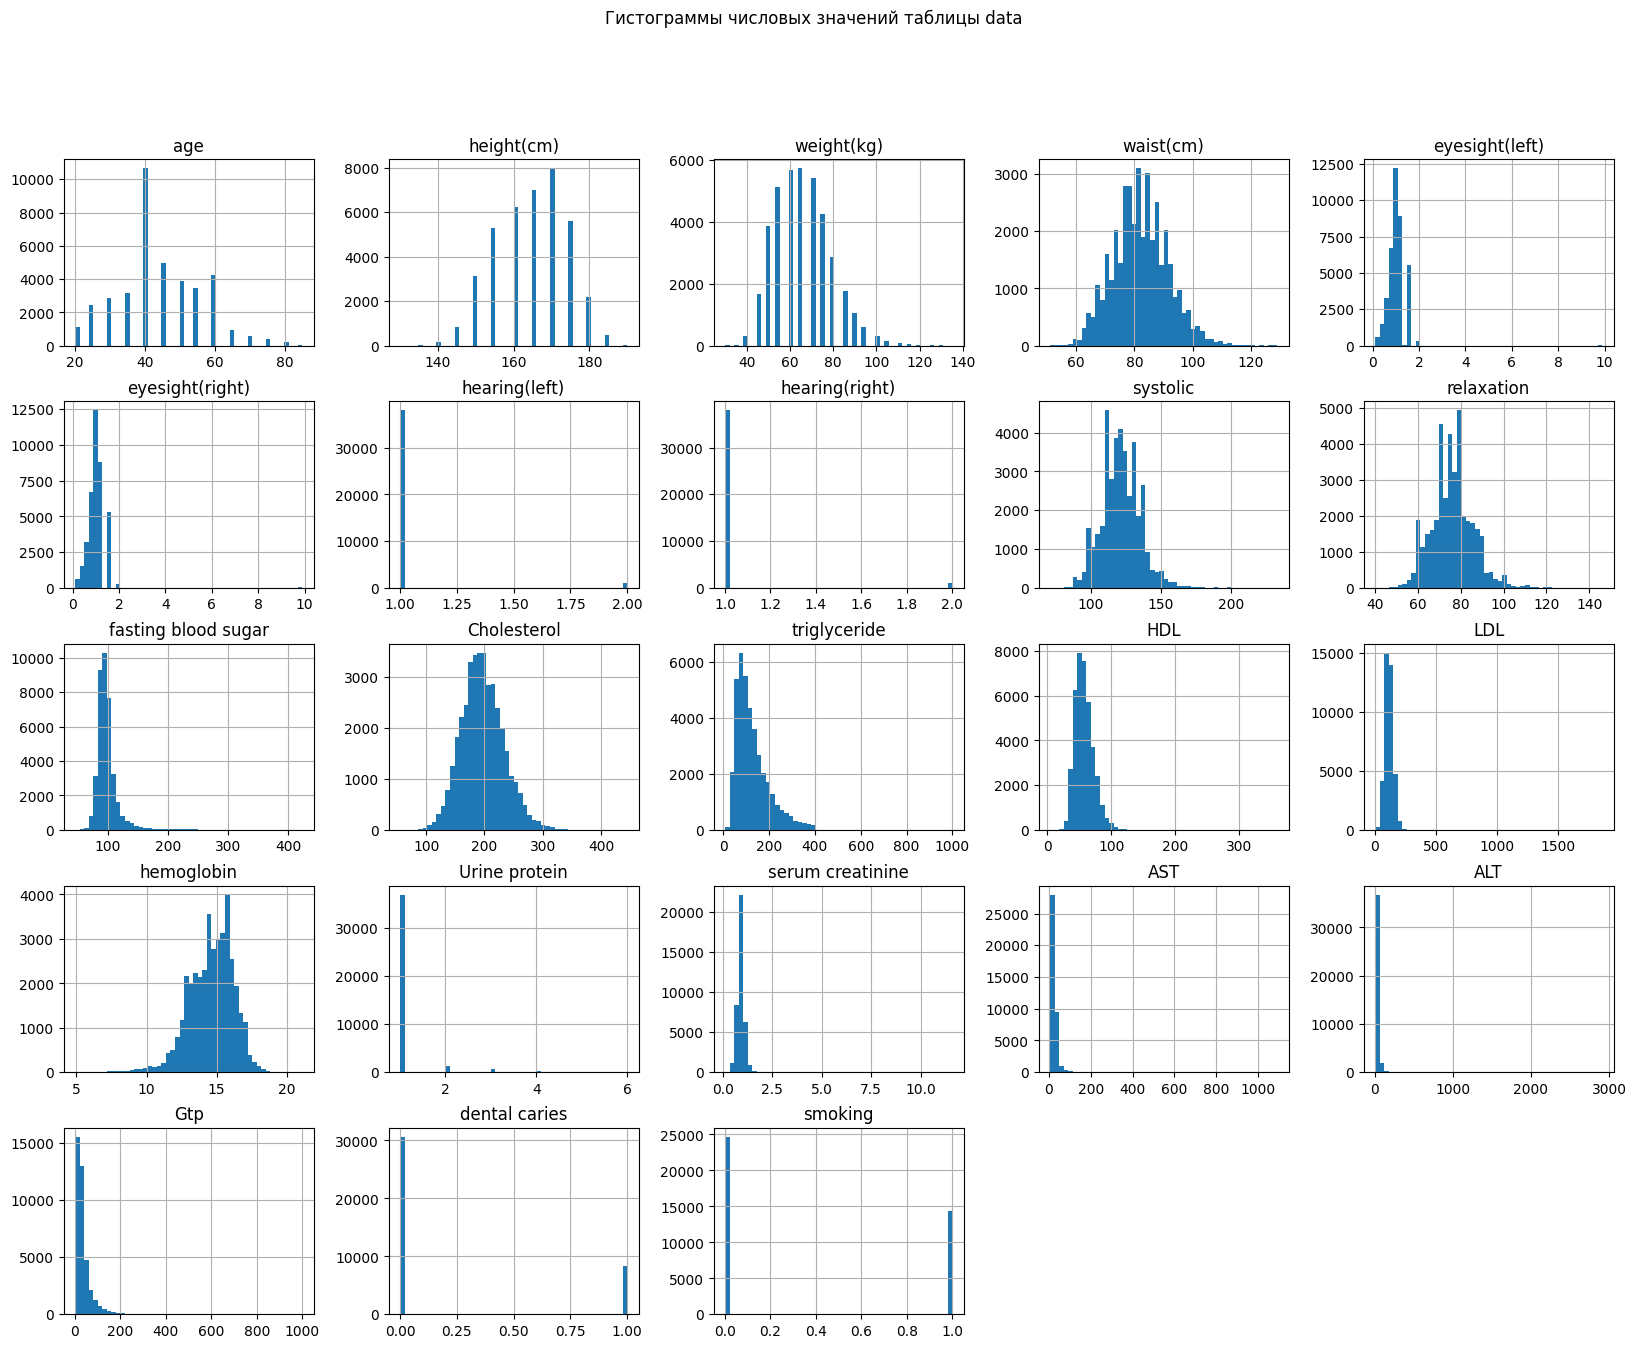

In [6]:
data.hist(bins=50, figsize=(20, 15))
plt.suptitle("Гистограммы числовых значений таблицы data")
plt.show()

## Рассмотрим целевой признак `smoking`

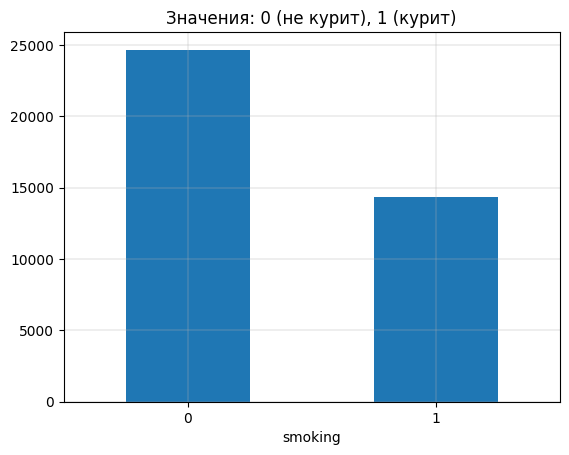

In [7]:
data['smoking'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Значения: 0 (не курит), 1 (курит)')
plt.show()

In [8]:
smoking_ratio = data['smoking'].mean()
print(f"Доля курящих (smoking = 1): {smoking_ratio:.2f}")

Доля курящих (smoking = 1): 0.37


Есть небольшой дисбаланс данных, учтем его в будущем при построении модели.

## Анализ данных

### Проверка на выбросы в данных

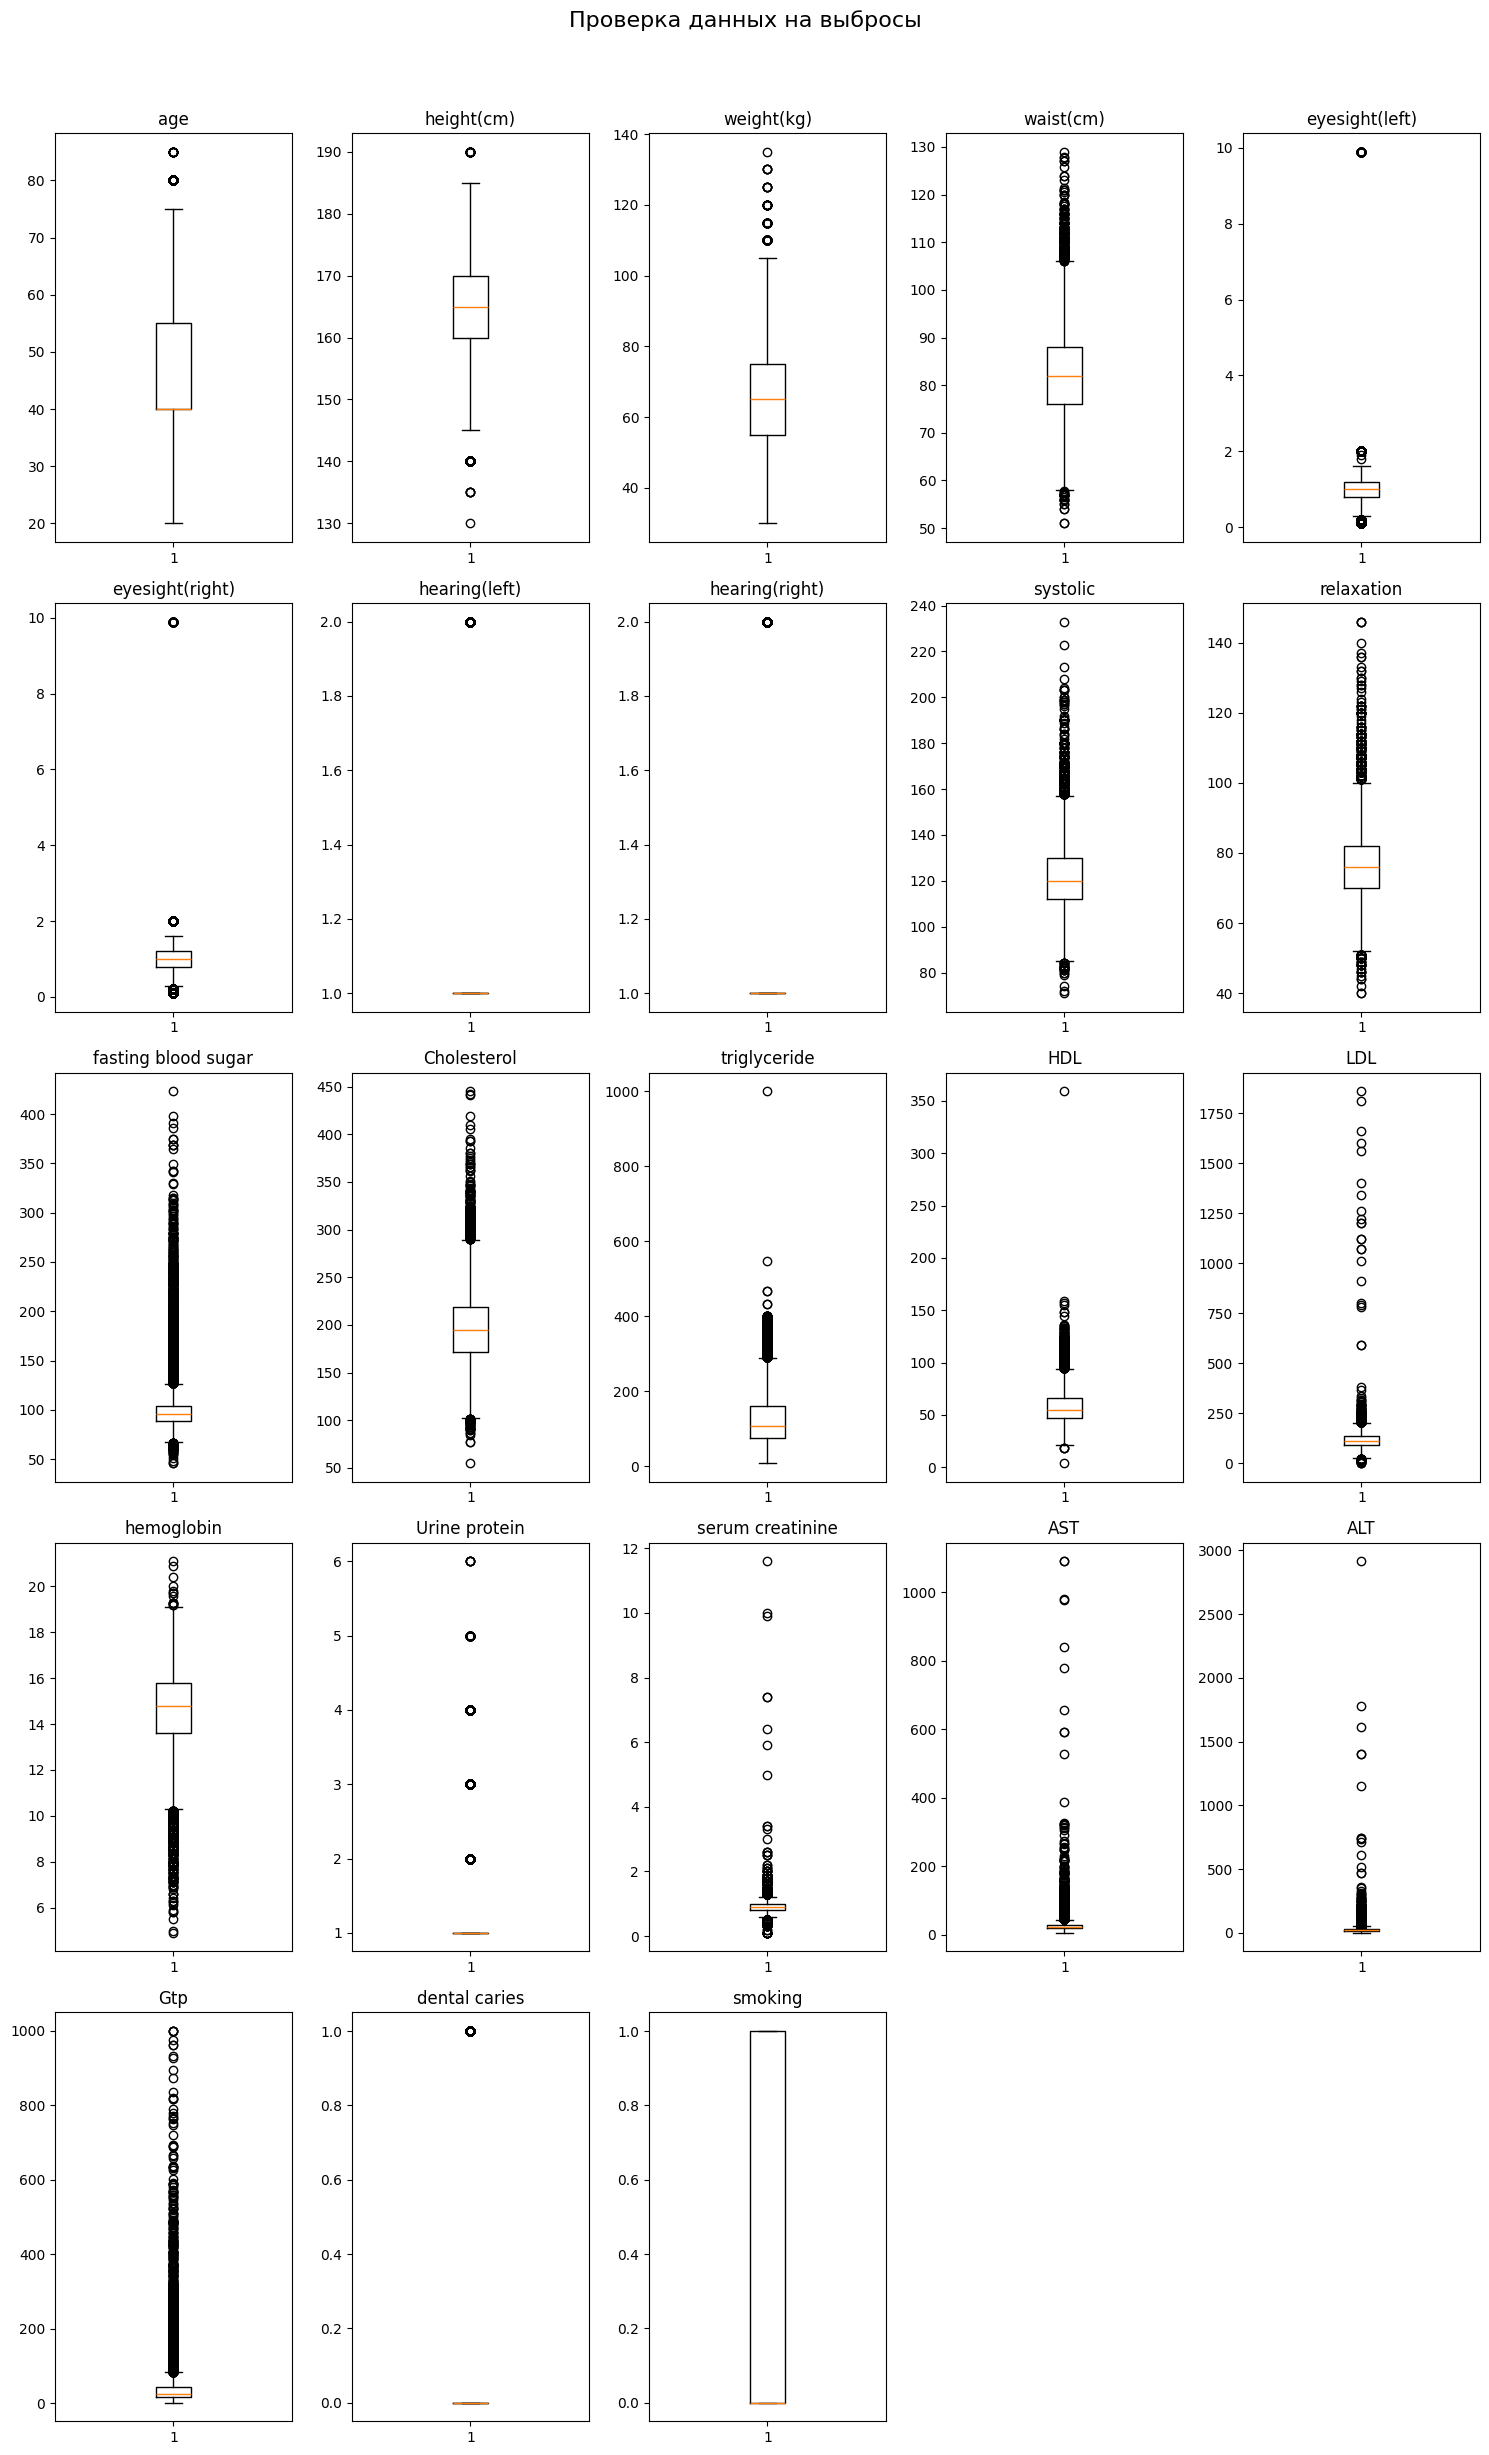

In [9]:
n = len(col_num)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col_num):
    axes[i].boxplot(data[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

### Признаки относительно целевого признака

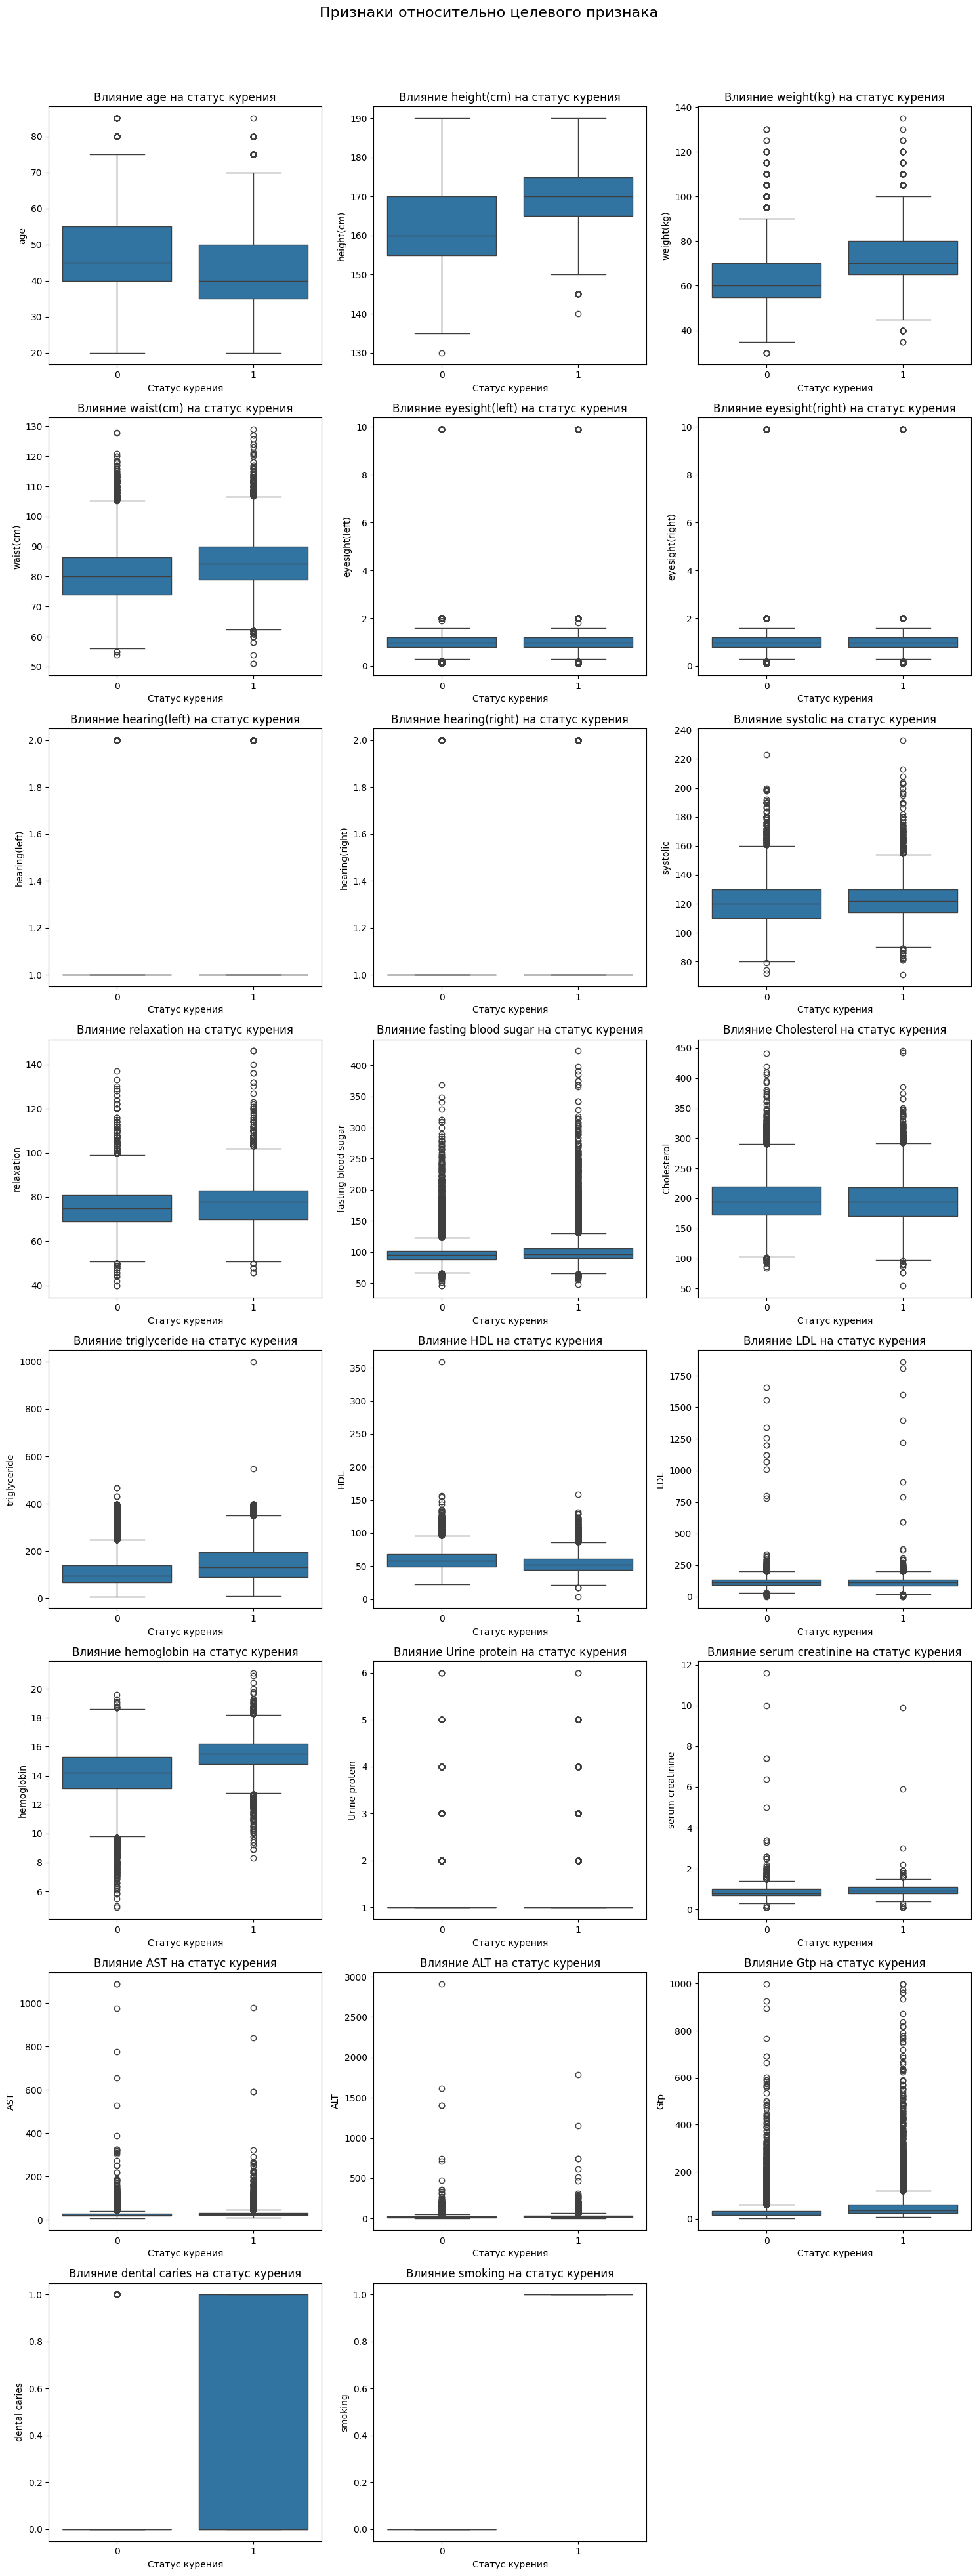

In [10]:
n = len(col_num)
ncols = 3  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

for i, feature in enumerate(col_num):
    sns.boxplot(x='smoking', y=feature, data=data, ax=axes[i])  # Указываем ось для каждого графика
    axes[i].set_title(f'Влияние {feature} на статус курения')
    axes[i].set_xlabel('Статус курения')
    axes[i].set_ylabel(feature)

# Убираем пустые подграфики, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Признаки относительно целевого признака", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Видим, что в некоторых данных имеются выбросы. Пока их трогать не будем, посмотрим как с ними поведет себя модель.

### Построим матрицу корреляции

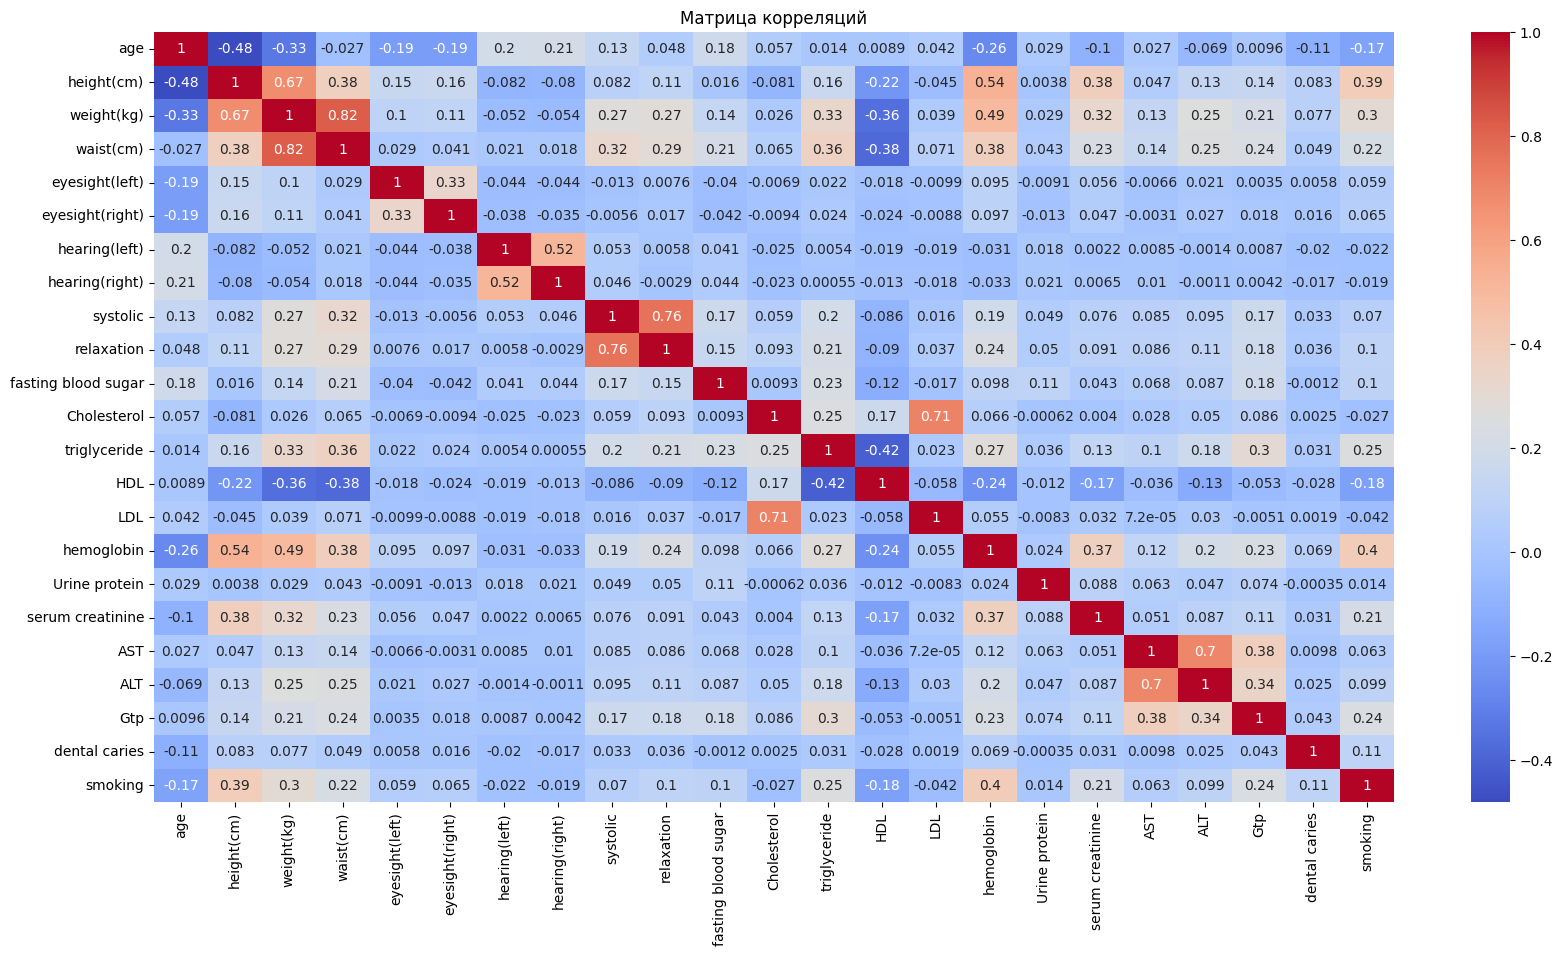

In [11]:
corr = data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Матрица корреляций")
plt.show()

Видим хорошую корреляцию между Cholesterol и LDL, relaxation и systolic, waist(cm) и weight(kg), AST и ALT.

## Построим модель Decision Tree (с выбросами в данных)

### Поделим нашу таблицу на тренировочную и тестовую в соотношении 80/20

In [12]:
X = data.drop('smoking', axis=1)
y = data['smoking']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train.shape)
print('Размер тестовой выборки (признаки):', X_test.shape)
print('Размер тренировочной выборки (целевой признак):', y_train.shape)
print('Размер тестовой выборки (целевой признак):', y_test.shape)

Размер тренировочной выборки (признаки): (31187, 22)
Размер тестовой выборки (признаки): (7797, 22)
Размер тренировочной выборки (целевой признак): (31187,)
Размер тестовой выборки (целевой признак): (7797,)


### Подберем гиперпараметры для модели

In [13]:
def calculate_metrics_and_plot_roc(model, X_train, y_train, X_test, y_test):
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание вероятностей на обучающей и тестовой выборке
    y_train_proba = model.predict_proba(X_train)[:, 1]
    y_test_proba = model.predict_proba(X_test)[:, 1]

    # Расчет AUC-ROC
    roc_auc_train = roc_auc_score(y_train, y_train_proba)
    roc_auc_test = roc_auc_score(y_test, y_test_proba)
    print(f"ROC-AUC Train: {roc_auc_train:.2f}")
    print(f"ROC-AUC Test: {roc_auc_test:.2f}")

    # Построение ROC-кривой
    fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
    fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)
    plt.figure()
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='ROC Curve Train')
    plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='ROC Curve Test')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve ({type(model).__name__})')
    plt.legend()
    plt.show()

    # Поиск порога, максимизирующего F1-score
    thresholds = np.arange(0.0, 1.0, 0.01)
    f1_scores = [f1_score(y_test, y_test_proba >= t) for t in thresholds]
    optimal_threshold = thresholds[np.argmax(f1_scores)]
    print(f"Optimal Threshold: {optimal_threshold:.2f}")

    # Пересчет метрик с учетом оптимального порога
    y_train_pred_optimal = (y_train_proba >= optimal_threshold).astype(int)
    y_test_pred_optimal = (y_test_proba >= optimal_threshold).astype(int)

    train_accuracy = accuracy_score(y_train, y_train_pred_optimal)
    train_precision = precision_score(y_train, y_train_pred_optimal)
    train_recall = recall_score(y_train, y_train_pred_optimal)
    test_accuracy = accuracy_score(y_test, y_test_pred_optimal)
    test_precision = precision_score(y_test, y_test_pred_optimal)
    test_recall = recall_score(y_test, y_test_pred_optimal)

    print(f"Optimal Training Accuracy: {train_accuracy:.2f}")
    print(f"Optimal Training Precision: {train_precision:.2f}")
    print(f"Optimal Training Recall: {train_recall:.2f}")

    print(f"Optimal Test Accuracy: {test_accuracy:.2f}")
    print(f"Optimal Test Precision: {test_precision:.2f}")
    print(f"Optimal Test Recall: {test_recall:.2f}")

    metrics = {
        'params': [
            'Training_Accuracy', 'Test_Accuracy',
            'Training_Precision', 'Test_Precision',
            'Training_Recall', 'Test_Recall',
            'ROC_AUC_Train', 'ROC_AUC_Test'
        ],
        'values': [
            train_accuracy, test_accuracy,
            train_precision, test_precision,
            train_recall, test_recall,
            roc_auc_train, roc_auc_test
        ]
    }

    return metrics

In [14]:
# Определяем сетку гиперпараметров
param_grid = {
    'criterion': ['gini', 'entropy'], #log_loss
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    # 'max_depth': [None] + [i for i in range(1, 30)],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Создаем модель решающего дерева
dt_classifier = DecisionTreeClassifier()

# Создаем объект GridSearchCV c сеткой параметров
grid_search = GridSearchCV(dt_classifier, param_grid, cv=5, n_jobs=-1)
# Обучаем модель на данных с использованием кросс-валидации
grid_search.fit(X_train, y_train)

print('Лучшее значение параметра:', grid_search.best_params_)


# Создаем модель решающего дерева
best_dt_classifier = DecisionTreeClassifier(**grid_search.best_params_)

Лучшее значение параметра: {'criterion': 'entropy', 'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2}


ROC-AUC Train: 1.00
ROC-AUC Test: 0.72


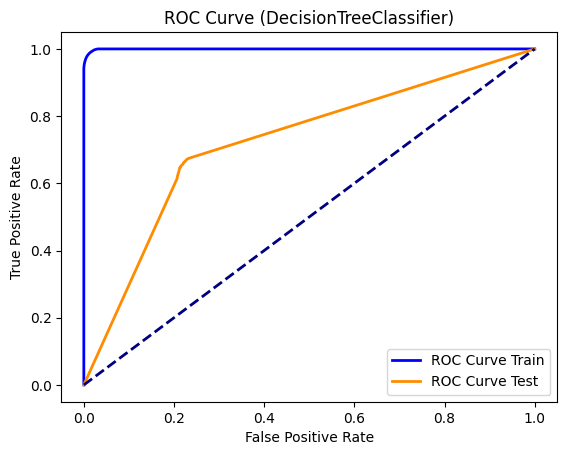

Optimal Threshold: 0.16
Optimal Training Accuracy: 0.98
Optimal Training Precision: 0.95
Optimal Training Recall: 1.00
Optimal Test Accuracy: 0.73
Optimal Test Precision: 0.62
Optimal Test Recall: 0.67


In [15]:
metrics_dt_classifier = calculate_metrics_and_plot_roc(
    best_dt_classifier,
    X_train,
    y_train,
    X_test,
    y_test
  )

**Видим, что лучшие значения метрик мы получили при параметрах `{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 4}`.** На тренировочных данных модель обучилась на "отлично" (переобучилась), но значения на тестовой выборке не очень хорошие, точность модели по метрике Accuracy - 0.73

### Построим матрицу ошибок

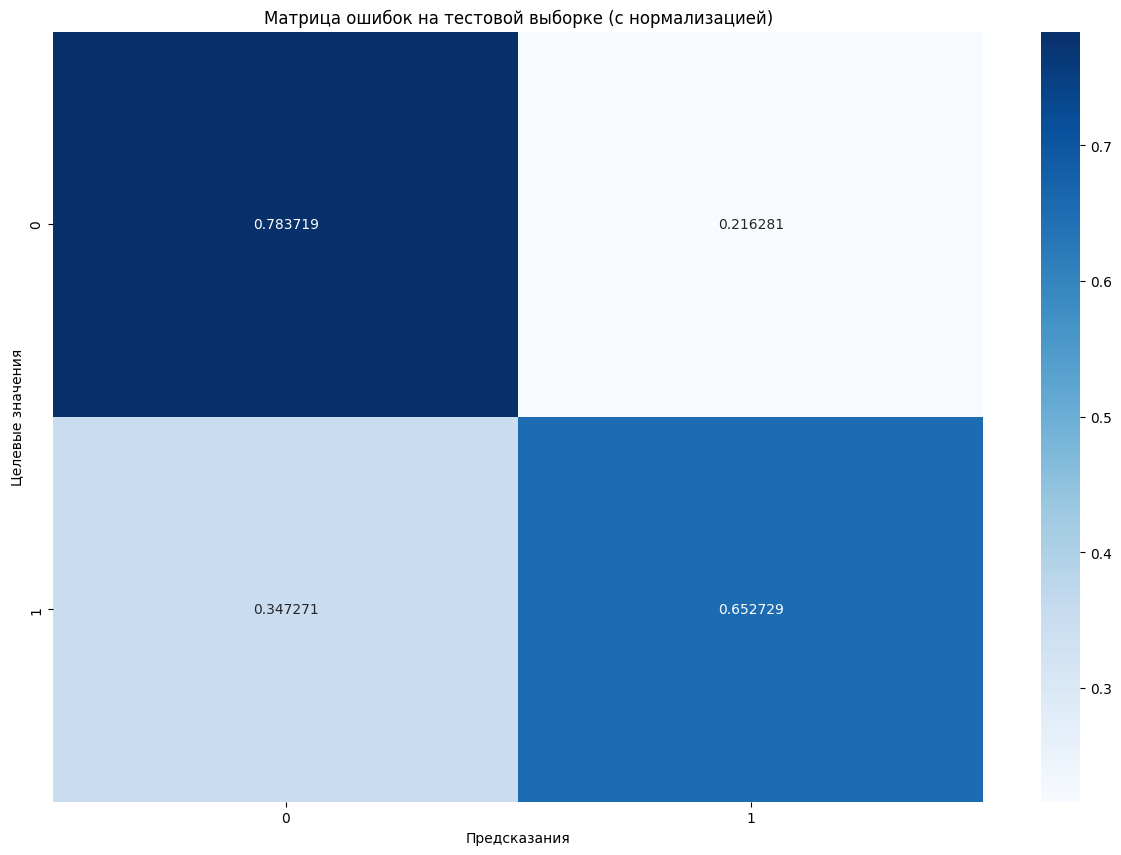

In [16]:
pred_test = best_dt_classifier.predict(X_test)
cm = confusion_matrix(y_test, pred_test, normalize='true')
plt.subplots( figsize=(15, 10))
sns.heatmap(cm, annot=True,  fmt='g', cmap='Blues')

plt.title('Матрица ошибок на тестовой выборке (с нормализацией)', fontsize=12 )
plt.xlabel('Предсказания')
plt.ylabel('Целевые значения')
plt.show()

По Матрице ошибок видна следующая картина:

- True Positive (истинно-положительное решение): человек не курит и модель это предсказала (Предсказания 0 : Целевые значения 0) - 77%
- False Positive (ложноположительное решение): ошибка 1-го рода, ML-модель предсказала что человек курит, а на самом деле нет (Предсказания 1 : Целевые значения 0) - 23%
- False Negative (ложноотрицательное решение): ошибка 2-го рода – ML-модель предсказала, что человек не курит, но на самом деле курит (Предсказания 0 : Целевые значения 1) - 34%
- True Negative (истинно-отрицательное решение): человек курит и прогноз модели это предсказал (Предсказания 1 : Целевые значения 1) - 66%

### Визуальное представление Дерева решений

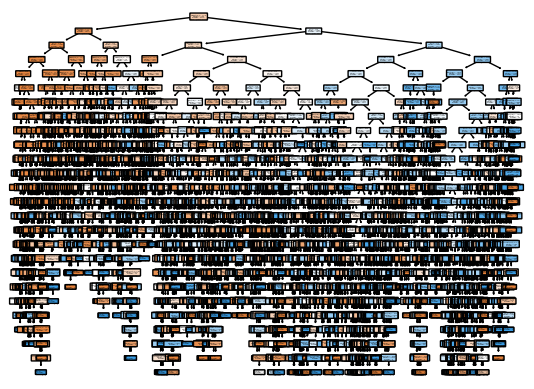

In [17]:
plot_tree(best_dt_classifier, feature_names=X.columns, filled=True, rounded=True)
plt.show()

Получилось не очень читабельно, ограничим глубину дерева до 5 и построим снова.

accuracy_score: 0.72


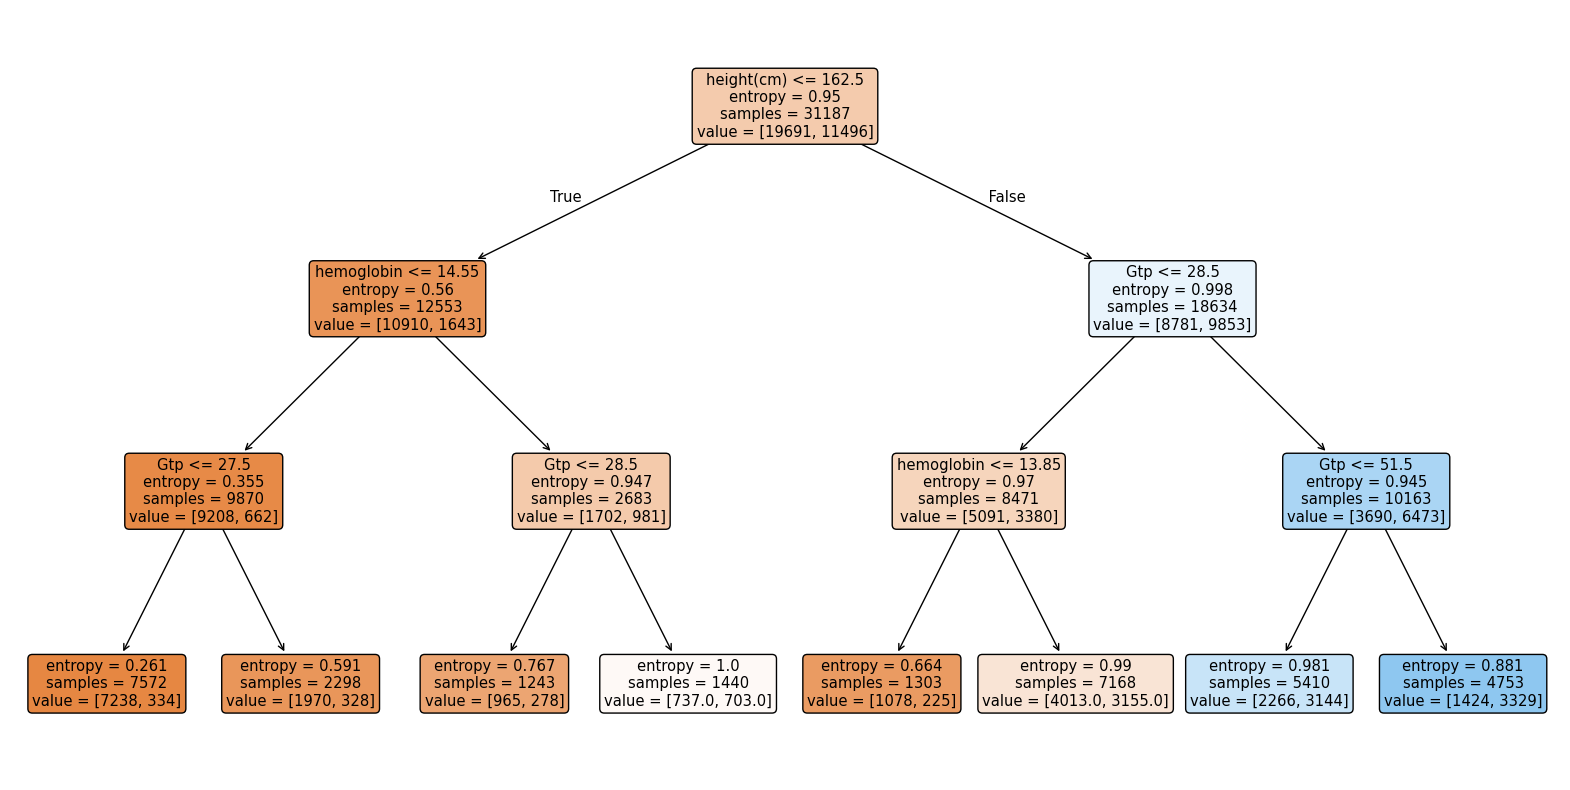

In [18]:
dt_max_depth_3 = DecisionTreeClassifier(max_depth=3, criterion='entropy', min_samples_leaf=1, min_samples_split=4)
dt_max_depth_3.fit(X_train, y_train)
print(
    f"accuracy_score: {accuracy_score(y_test, dt_max_depth_3.predict(X_test)):.2f}"
)

# Отрисовка дерева
plt.figure(figsize=(20, 10))  # Установка размера графика
plot_tree(
    dt_max_depth_3,
    feature_names=X.columns,
    filled=True,  # Заполнение узлов цветом в зависимости от класса
    rounded=True  # Закругленные углы у прямоугольников узлов
)

# Сохранение графика в файл
plt.savefig('tree_plot.png', bbox_inches='tight')

plt.show()

### Важность признаков

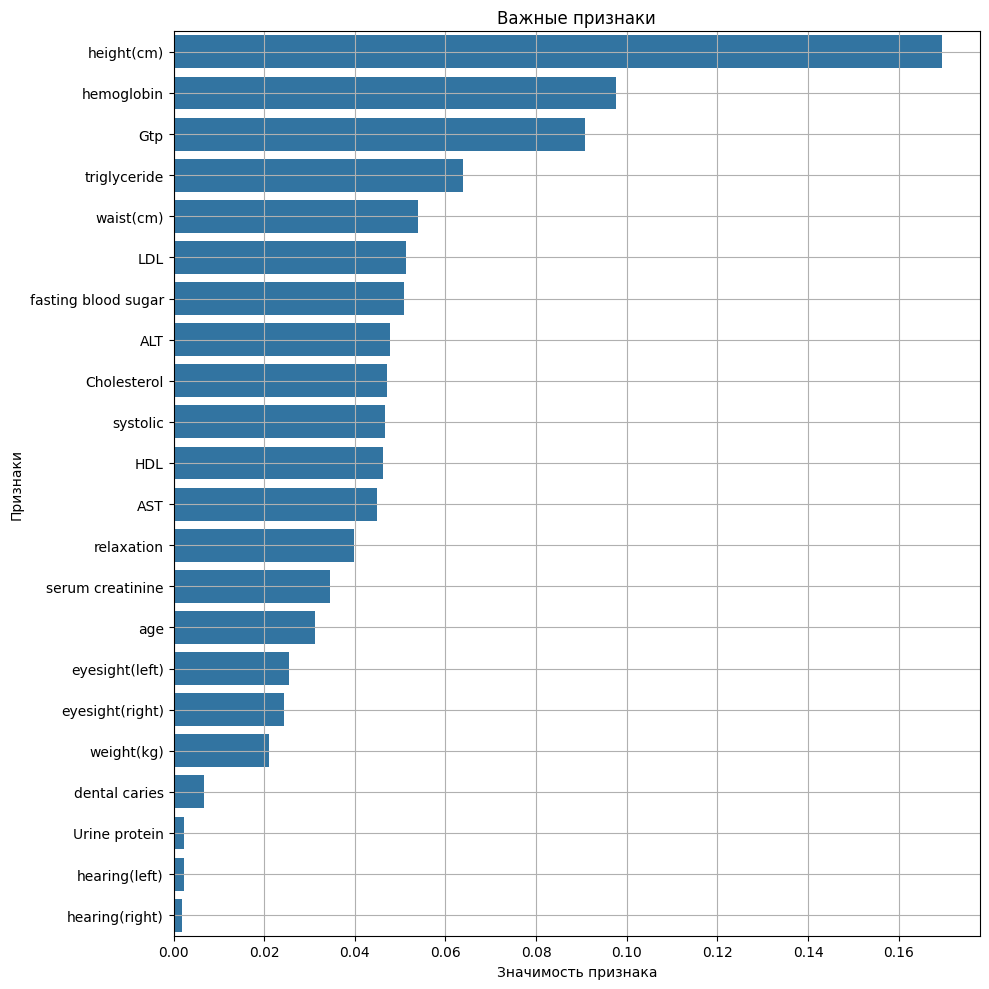

In [19]:
feature_imp = pd.DataFrame(
    sorted(zip(best_dt_classifier.feature_importances_, X.columns)),
    columns=['Значимость признака','Признаки'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Значимость признака",
            y="Признаки",
            data=feature_imp.sort_values(by="Значимость признака", ascending=False))
plt.title('Важные признаки')
plt.tight_layout()
plt.grid()
plt.show()

Интересно, что наиболее значимым признаком является рост человека, и только на втором месте с заметным отрывом идет гемоглобин. Такое влияние одного признака могло возникнуть из-за **выбросов**, которые мы не стали убирать изначально. Попробуем почистить исходный датафрейм от выбросов и посмотрим, изменятся метрики качества модели или нет.

## Построим модель Decision Tree (без выбросов в данных)

In [20]:
# Обработаем выбросы
def outliers_in_data(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

    return df


data_without_outliers = outliers_in_data(data, data.columns)

In [21]:
data_without_outliers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38984 entries, 0 to 38983
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  float64
 1   height(cm)           38984 non-null  float64
 2   weight(kg)           38984 non-null  float64
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  float64
 7   hearing(right)       38984 non-null  float64
 8   systolic             38984 non-null  float64
 9   relaxation           38984 non-null  float64
 10  fasting blood sugar  38984 non-null  float64
 11  Cholesterol          38984 non-null  float64
 12  triglyceride         38984 non-null  float64
 13  HDL                  38984 non-null  float64
 14  LDL                  38984 non-null  float64
 15  hemoglobin           38984 non-null 

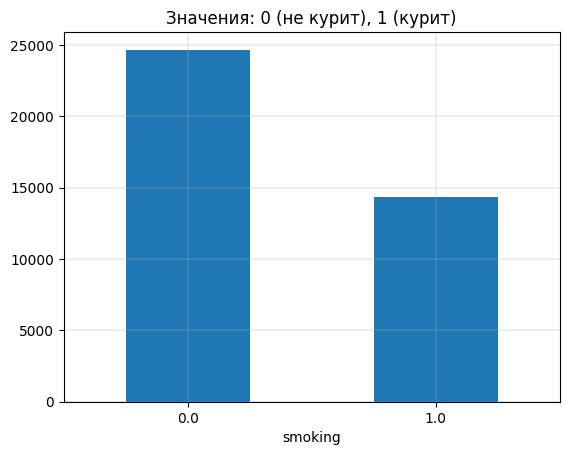

In [22]:
data_without_outliers['smoking'].value_counts().sort_index().plot(kind='bar')
plt.xticks(rotation=0)
plt.grid(linewidth=0.3)
plt.title('Значения: 0 (не курит), 1 (курит)')
plt.show()

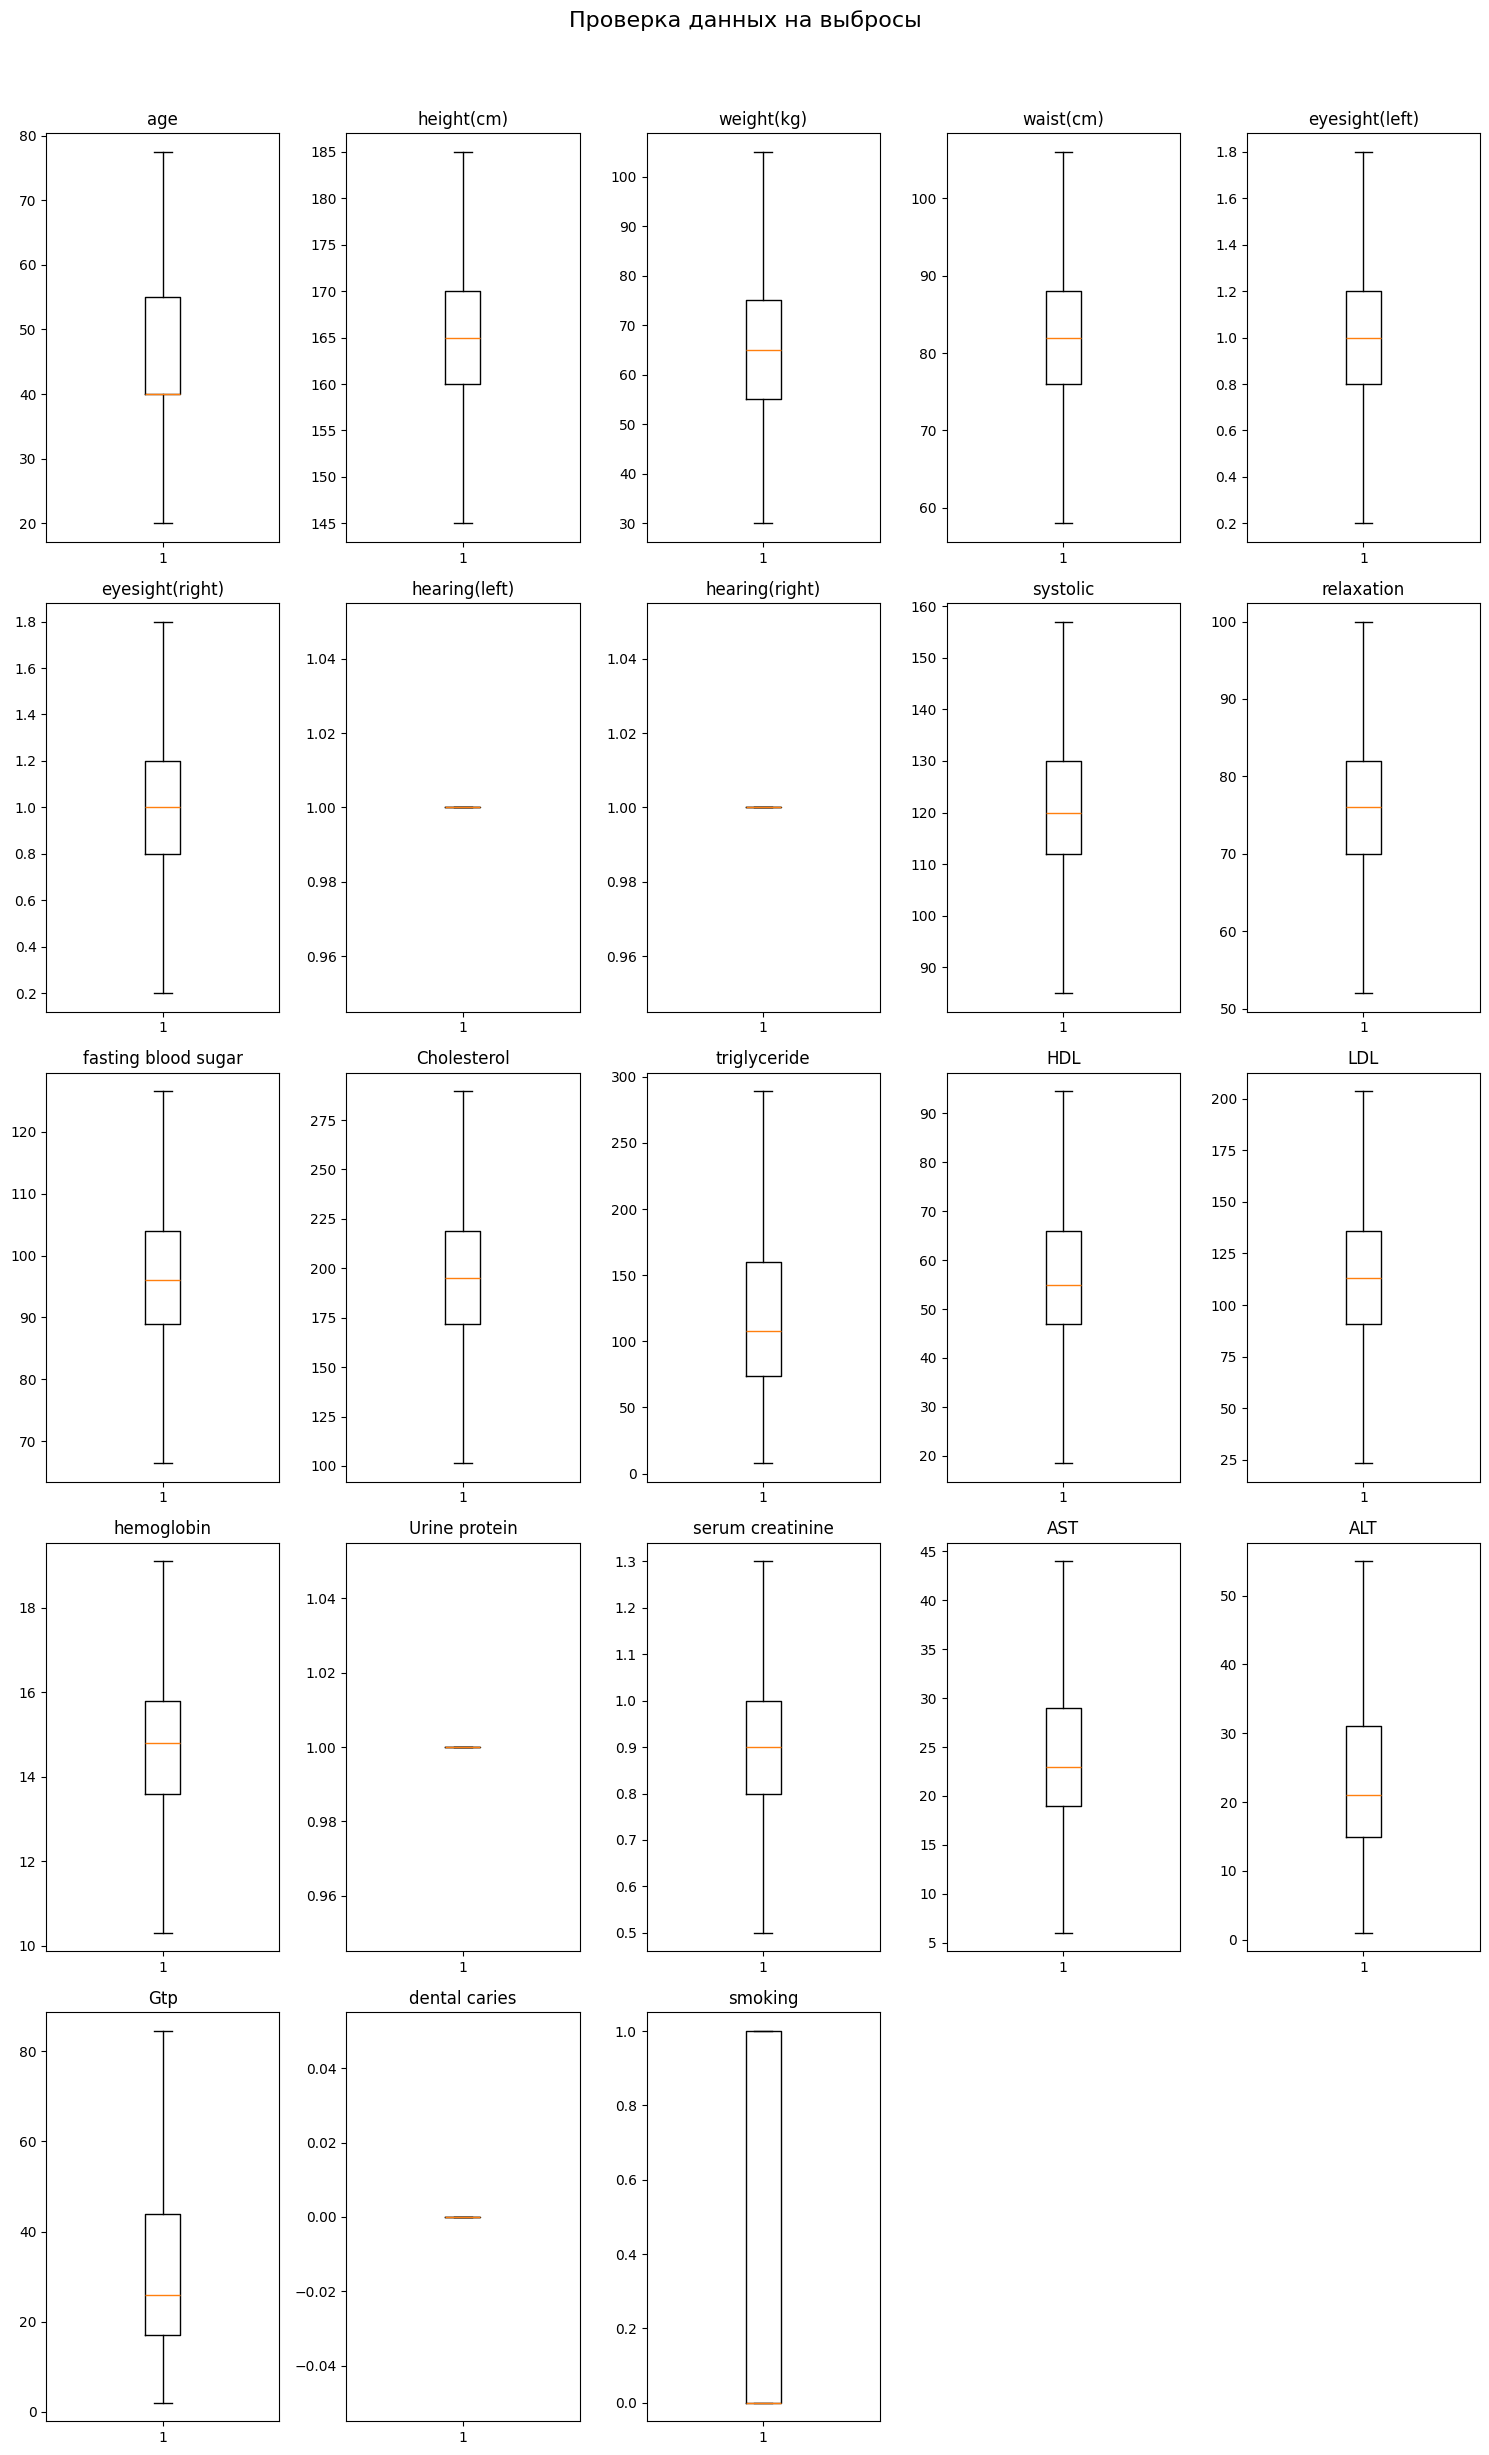

In [23]:
n = len(col_num)
ncols = 5  # Количество столбцов в сетке
nrows = (n + ncols - 1) // ncols  # Количество строк

# Создание фигуры и подграфиков
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
axes = axes.flatten()  # Преобразование в одномерный массив для удобства

# Создание boxplot для каждого числового столбца
for i, column in enumerate(col_num):
    axes[i].boxplot(data_without_outliers[column])
    axes[i].set_title(column)  # Заголовок для каждого графика

# Удаление пустых подграфиков, если они есть
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Проверка данных на выбросы", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Автоматическая настройка отступов
plt.show()  # Отображение графиков

Данные от выбросов почищены. Проверим как поведет себя модель с такими данными.

### Поделим таблицу

In [24]:
X_1 = data_without_outliers.drop('smoking', axis=1)
y_1 = data_without_outliers['smoking']

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

print('Размер тренировочной выборки (признаки):', X_train_1.shape)
print('Размер тестовой выборки (признаки):', X_test_1.shape)
print('Размер тренировочной выборки (целевой признак):', y_train_1.shape)
print('Размер тестовой выборки (целевой признак):', y_test_1.shape)

Размер тренировочной выборки (признаки): (31187, 22)
Размер тестовой выборки (признаки): (7797, 22)
Размер тренировочной выборки (целевой признак): (31187,)
Размер тестовой выборки (целевой признак): (7797,)


### Подберем гиперпараметры для модели

In [25]:
# Определяем сетку гиперпараметров
param_grid_1 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15, 20, 25, 30],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

# Создаем модель решающего дерева
dt_classifier_1 = DecisionTreeClassifier()

# Создаем объект GridSearchCV c сеткой параметров
grid_search_1 = GridSearchCV(dt_classifier_1, param_grid_1, cv=5, n_jobs=-1)
# Обучаем модель на данных с использованием кросс-валидации
grid_search_1.fit(X_train_1, y_train_1)

print('Лучшее значение параметра:', grid_search_1.best_params_)


# Создаем модель решающего дерева
best_dt_classifier_1 = DecisionTreeClassifier(**grid_search_1.best_params_)

Лучшее значение параметра: {'criterion': 'entropy', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}


ROC-AUC Train: 1.00
ROC-AUC Test: 0.73


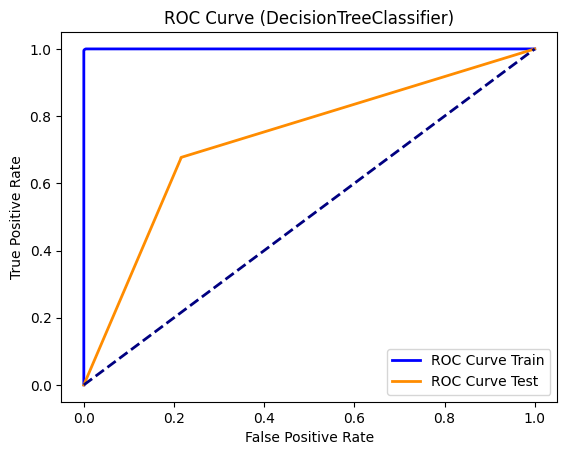

Optimal Threshold: 0.23
Optimal Training Accuracy: 1.00
Optimal Training Precision: 0.99
Optimal Training Recall: 1.00
Optimal Test Accuracy: 0.75
Optimal Test Precision: 0.64
Optimal Test Recall: 0.68


In [26]:
metrics_dt_classifier_1 = calculate_metrics_and_plot_roc(
    best_dt_classifier_1,
    X_train_1,
    y_train_1,
    X_test_1,
    y_test_1
  )

### Построим матрицу ошибок

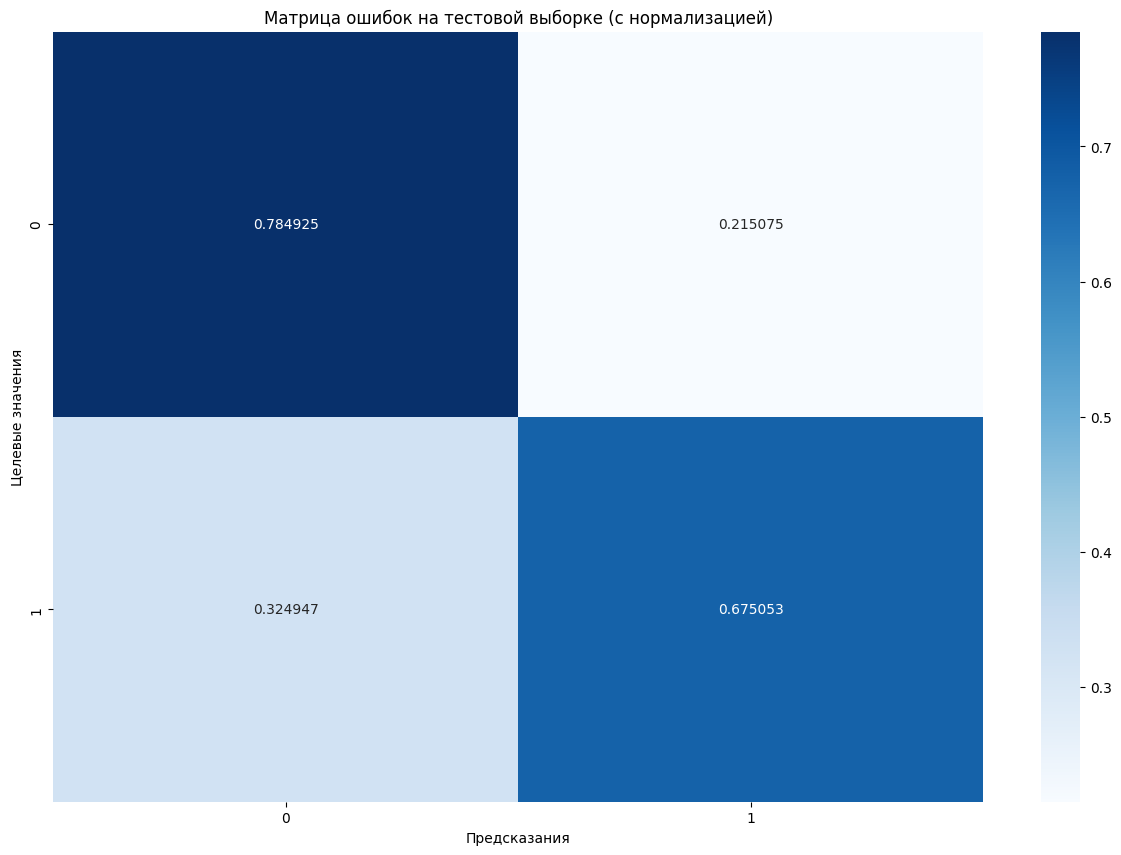

In [27]:
pred_test_1 = best_dt_classifier_1.predict(X_test_1)
cm = confusion_matrix(y_test_1, pred_test_1, normalize='true')
plt.subplots( figsize=(15, 10))
sns.heatmap(cm, annot=True,  fmt='g', cmap='Blues')

plt.title('Матрица ошибок на тестовой выборке (с нормализацией)', fontsize=12 )
plt.xlabel('Предсказания')
plt.ylabel('Целевые значения')
plt.show()

### Визуальное представление

accuracy_score: 0.72


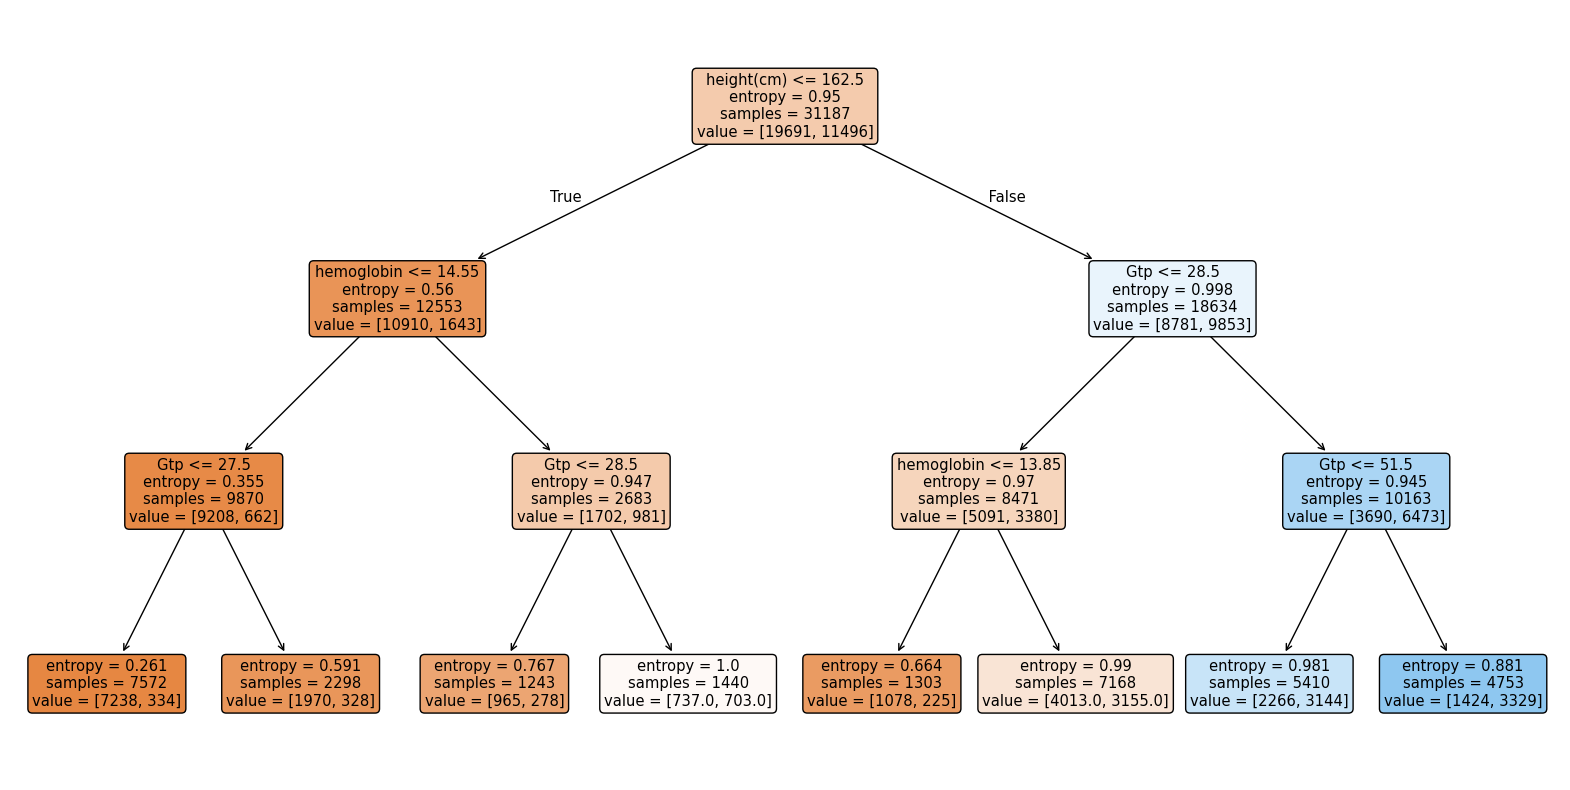

In [28]:
dt_max_depth_3_1 = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    min_samples_leaf=1,
    min_samples_split=2
  )
dt_max_depth_3_1.fit(X_train_1, y_train_1)
print(
    f"accuracy_score: {accuracy_score(y_test_1, dt_max_depth_3_1.predict(X_test_1)):.2f}"
)

# Отрисовка дерева
plt.figure(figsize=(20, 10))  # Установка размера графика
plot_tree(
    dt_max_depth_3_1,
    feature_names=X_1.columns,
    filled=True,  # Заполнение узлов цветом в зависимости от класса
    rounded=True  # Закругленные углы у прямоугольников узлов
)

# Сохранение графика в файл
plt.savefig('tree_plot_1.png', bbox_inches='tight')

plt.show()

### Важность признаков

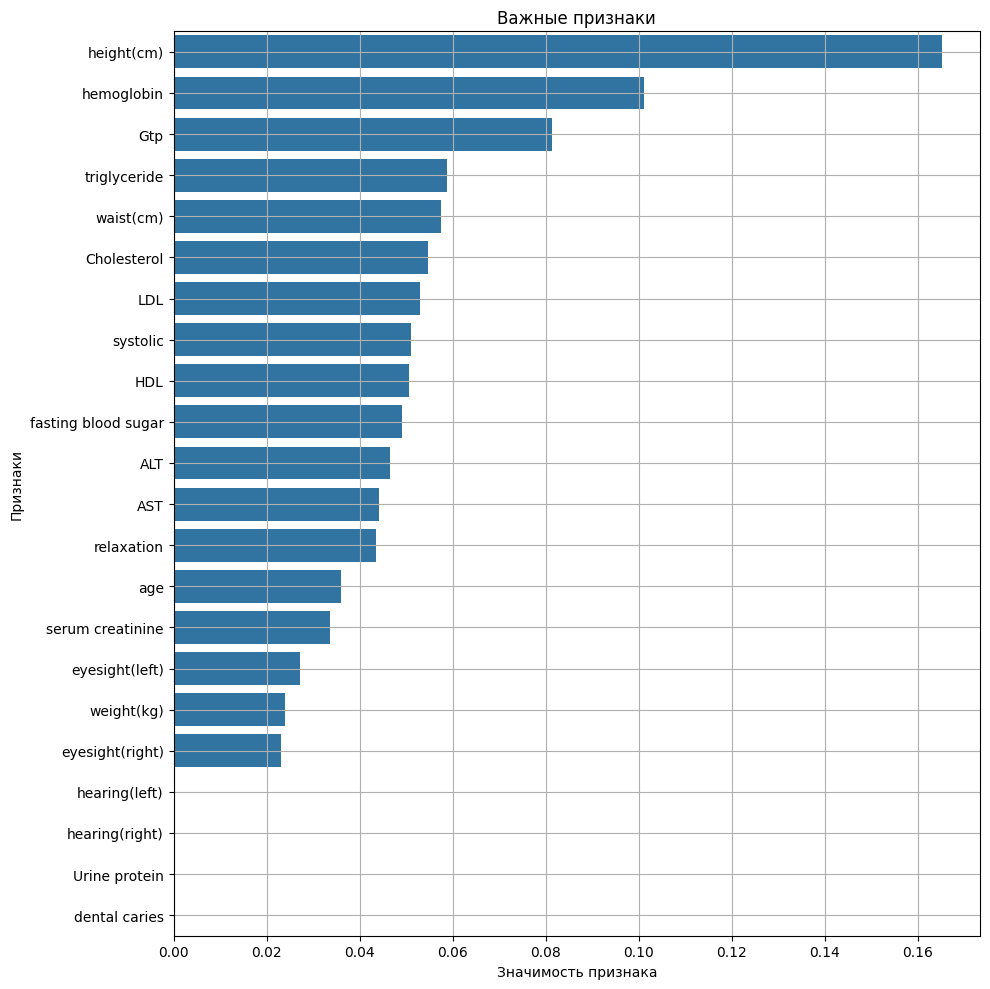

In [29]:
feature_imp_1 = pd.DataFrame(
    sorted(zip(best_dt_classifier_1.feature_importances_, X_1.columns)),
    columns=['Значимость признака','Признаки'])

plt.figure(figsize=(10, 10))
sns.barplot(x="Значимость признака",
            y="Признаки",
            data=feature_imp_1.sort_values(
                by="Значимость признака",
                ascending=False)
            )
plt.title('Важные признаки')
plt.tight_layout()
plt.grid()
plt.show()

От удаления выбросов особо ничего в метриках качества не изменилось. Слегка изменились гиперпараметры, но модель на тренировочных данных все равно переобучилась, а accuracy стало выше на 0.01 - 0.74

## Построим модель на одном столбце с наибольшим весом в модели

Столбец с наибольшим весом: height(cm)
Точность модели с одним столбцом: 0.68


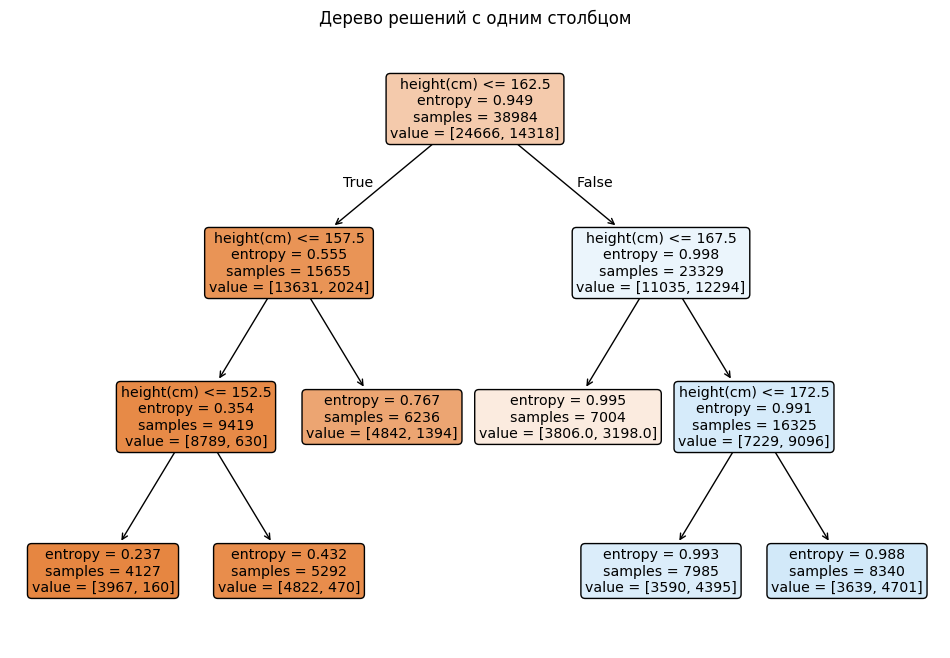

In [30]:
# Получаем важности признаков
importances = best_dt_classifier_1.feature_importances_
feature_importances = pd.DataFrame(
    importances,
    index=X_1.columns,
    columns=["importance"]
  ).sort_values("importance", ascending=False)

# Выбираем столбец с наибольшим весом
top_feature = feature_importances.index[0]
print(f"Столбец с наибольшим весом: {top_feature}")

# Создаем новый DataFrame с одним столбцом
X_single = X_1[[top_feature]]
y_single = y_1

# Обучаем модель с одним столбцом
single_feature_classifier = DecisionTreeClassifier(
    max_depth=3,
    criterion='entropy',
    min_samples_leaf=1,
    min_samples_split=2
  )
single_feature_classifier.fit(X_single, y_single)

# Оценка качества модели
accuracy_1 = single_feature_classifier.score(X_single, y_single)
print(f"Точность модели с одним столбцом: {accuracy_1:.2f}")

# Визуализация дерева решений
plt.figure(figsize=(12, 8))
plot_tree(
    single_feature_classifier,
    feature_names=[top_feature],
    filled=True,
    rounded=True
  )
plt.title("Дерево решений с одним столбцом")
# Сохранение графика в файл
plt.savefig('tree_plot_single_feature.png', bbox_inches='tight')
plt.show()

Видим, что метрика качества accuracy при обучении Дерева решений на одном столбце, который имеет наибольший вес хуже, чем при обучении на всех признаках данных, но разница небольшая: 0.74 - на всех данных и 0.68 на одном столбце.